In [1]:
import os
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter,A4, B4
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
from reportlab.graphics import renderPDF

In [135]:
import matplotlib.pyplot as plt
import yaml
import pandas as pd

import io
from PIL import Image
from svglib.svglib import svg2rlg
import dataframe_image as dfi

In [3]:
import backtesting as bt

### 1. 백테스팅

In [4]:
with open('03.전략연구/systems/system2.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': 'testSystem', 'description': '시스템 설명', 'sectors': 'default', 'instruments': ['AD'], 'from_date': '2019-08-01', 'to_date': None, 'principal': 1000000, 'heat_system': 'DefaultHeat', 'max_system_heat': 0.3, 'max_sector_heat': 0.3, 'max_trade_heat': 0.01, 'max_lots': 100, 'commission': 5.98, 'skid': 0.25, 'metrics': [['ema30', 'EMA', 'window=30'], ['ema5', 'EMA', 'window=5'], ['min30', 'MIN', 'window=30'], ['max300', 'MAX', 'window=300']], 'entry_rule': {'long': 'ema5>ema30', 'short': None}, 'exit_rule': {'long': 'ema5<ema30', 'short': None}, 'stop_rule': {'long': 'min30', 'short': None}}


In [5]:
trader = bt.Trader(systems=[system1])
system = trader.systems[0]
trader.run()

매매시작
거래일: 2019-08-01 00:00:00, 시스템: testSystem 3.812800407409668sec
거래일: 2019-08-02 00:00:00, 시스템: testSystem 0.0019960403442382812sec
거래일: 2019-08-05 00:00:00, 시스템: testSystem 0.001993894577026367sec
거래일: 2019-08-06 00:00:00, 시스템: testSystem 0.000997781753540039sec
거래일: 2019-08-07 00:00:00, 시스템: testSystem 0.001995563507080078sec
거래일: 2019-08-08 00:00:00, 시스템: testSystem 0.0019922256469726562sec
거래일: 2019-08-09 00:00:00, 시스템: testSystem 0.0019960403442382812sec
거래일: 2019-08-12 00:00:00, 시스템: testSystem 0.0019948482513427734sec
거래일: 2019-08-13 00:00:00, 시스템: testSystem 0.001995563507080078sec
거래일: 2019-08-14 00:00:00, 시스템: testSystem 0.0009951591491699219sec
거래일: 2019-08-15 00:00:00, 시스템: testSystem 0.00199127197265625sec
거래일: 2019-08-16 00:00:00, 시스템: testSystem 0.0019979476928710938sec
거래일: 2019-08-19 00:00:00, 시스템: testSystem 0.0019996166229248047sec
거래일: 2019-08-20 00:00:00, 시스템: testSystem 0.001989603042602539sec
거래일: 2019-08-21 00:00:00, 시스템: testSystem 0.0019915103912353516sec
거

거래일: 2020-04-24 00:00:00, 시스템: testSystem 0.007010936737060547sec
거래일: 2020-04-27 00:00:00, 시스템: testSystem 0.007949352264404297sec
거래일: 2020-04-28 00:00:00, 시스템: testSystem 0.007010698318481445sec
거래일: 2020-04-29 00:00:00, 시스템: testSystem 0.006981849670410156sec
거래일: 2020-04-30 00:00:00, 시스템: testSystem 0.005983591079711914sec
거래일: 2020-05-01 00:00:00, 시스템: testSystem 0.006980419158935547sec
거래일: 2020-05-04 00:00:00, 시스템: testSystem 0.00698089599609375sec
거래일: 2020-05-05 00:00:00, 시스템: testSystem 0.007982015609741211sec
거래일: 2020-05-06 00:00:00, 시스템: testSystem 0.00897216796875sec
거래일: 2020-05-07 00:00:00, 시스템: testSystem 0.008948087692260742sec
거래일: 2020-05-08 00:00:00, 시스템: testSystem 0.009973287582397461sec
거래일: 2020-05-11 00:00:00, 시스템: testSystem 0.010970830917358398sec
거래일: 2020-05-12 00:00:00, 시스템: testSystem 0.011967658996582031sec
거래일: 2020-05-13 00:00:00, 시스템: testSystem 0.011968374252319336sec
거래일: 2020-05-14 00:00:00, 시스템: testSystem 0.012964963912963867sec
거래일: 2020-05-15

거래일: 2020-12-03 00:00:00, 시스템: testSystem 0.015982389450073242sec
거래일: 2020-12-04 00:00:00, 시스템: testSystem 0.01692938804626465sec
거래일: 2020-12-07 00:00:00, 시스템: testSystem 0.016982555389404297sec
거래일: 2020-12-08 00:00:00, 시스템: testSystem 0.0189516544342041sec
거래일: 2020-12-09 00:00:00, 시스템: testSystem 0.017945051193237305sec
거래일: 2020-12-10 00:00:00, 시스템: testSystem 0.019953012466430664sec
거래일: 2020-12-11 00:00:00, 시스템: testSystem 0.019918203353881836sec
거래일: 2020-12-14 00:00:00, 시스템: testSystem 0.019974946975708008sec
거래일: 2020-12-15 00:00:00, 시스템: testSystem 0.02091526985168457sec
거래일: 2020-12-16 00:00:00, 시스템: testSystem 0.021968603134155273sec
거래일: 2020-12-17 00:00:00, 시스템: testSystem 0.02191329002380371sec
거래일: 2020-12-18 00:00:00, 시스템: testSystem 0.022968053817749023sec
거래일: 2020-12-21 00:00:00, 시스템: testSystem 0.02393507957458496sec
거래일: 2020-12-22 00:00:00, 시스템: testSystem 0.024904251098632812sec
거래일: 2020-12-23 00:00:00, 시스템: testSystem 0.025954246520996094sec
거래일: 2020-12-24 

거래일: 2021-06-24 00:00:00, 시스템: testSystem 0.002023458480834961sec
거래일: 2021-06-25 00:00:00, 시스템: testSystem 0.0029625892639160156sec
거래일: 2021-06-28 00:00:00, 시스템: testSystem 0.002023935317993164sec
거래일: 2021-06-29 00:00:00, 시스템: testSystem 0.0009672641754150391sec
거래일: 2021-06-30 00:00:00, 시스템: testSystem 0.0020294189453125sec
거래일: 2021-07-01 00:00:00, 시스템: testSystem 0.0019876956939697266sec
거래일: 2021-07-02 00:00:00, 시스템: testSystem 0.001968860626220703sec
거래일: 2021-07-05 00:00:00, 시스템: testSystem 0.002020597457885742sec
거래일: 2021-07-06 00:00:00, 시스템: testSystem 0.001996755599975586sec
거래일: 2021-07-07 00:00:00, 시스템: testSystem 0.001992940902709961sec
거래일: 2021-07-08 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2021-07-09 00:00:00, 시스템: testSystem 0.0009968280792236328sec
거래일: 2021-07-12 00:00:00, 시스템: testSystem 0.001995086669921875sec
거래일: 2021-07-13 00:00:00, 시스템: testSystem 0.0019683837890625sec
거래일: 2021-07-14 00:00:00, 시스템: testSystem 0.0019943714141845703sec
거래일: 2021

거래일: 2021-12-20 00:00:00, 시스템: testSystem 0.001993417739868164sec
거래일: 2021-12-21 00:00:00, 시스템: testSystem 0.001995086669921875sec
거래일: 2021-12-22 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2021-12-23 00:00:00, 시스템: testSystem 0.0019941329956054688sec
거래일: 2021-12-24 00:00:00, 시스템: testSystem 0.0019953250885009766sec
거래일: 2021-12-27 00:00:00, 시스템: testSystem 0.0009970664978027344sec
거래일: 2021-12-28 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2021-12-29 00:00:00, 시스템: testSystem 0.0031952857971191406sec
거래일: 2021-12-30 00:00:00, 시스템: testSystem 0.003989219665527344sec
거래일: 2021-12-31 00:00:00, 시스템: testSystem 0.003989219665527344sec
거래일: 2022-01-03 00:00:00, 시스템: testSystem 0.004988431930541992sec
거래일: 2022-01-04 00:00:00, 시스템: testSystem 0.005984067916870117sec
거래일: 2022-01-05 00:00:00, 시스템: testSystem 0.007009267807006836sec
거래일: 2022-01-06 00:00:00, 시스템: testSystem 0.006975650787353516sec
거래일: 2022-01-07 00:00:00, 시스템: testSystem 0.007954597473144531sec
거래일: 2

NameError: name 'io' is not defined

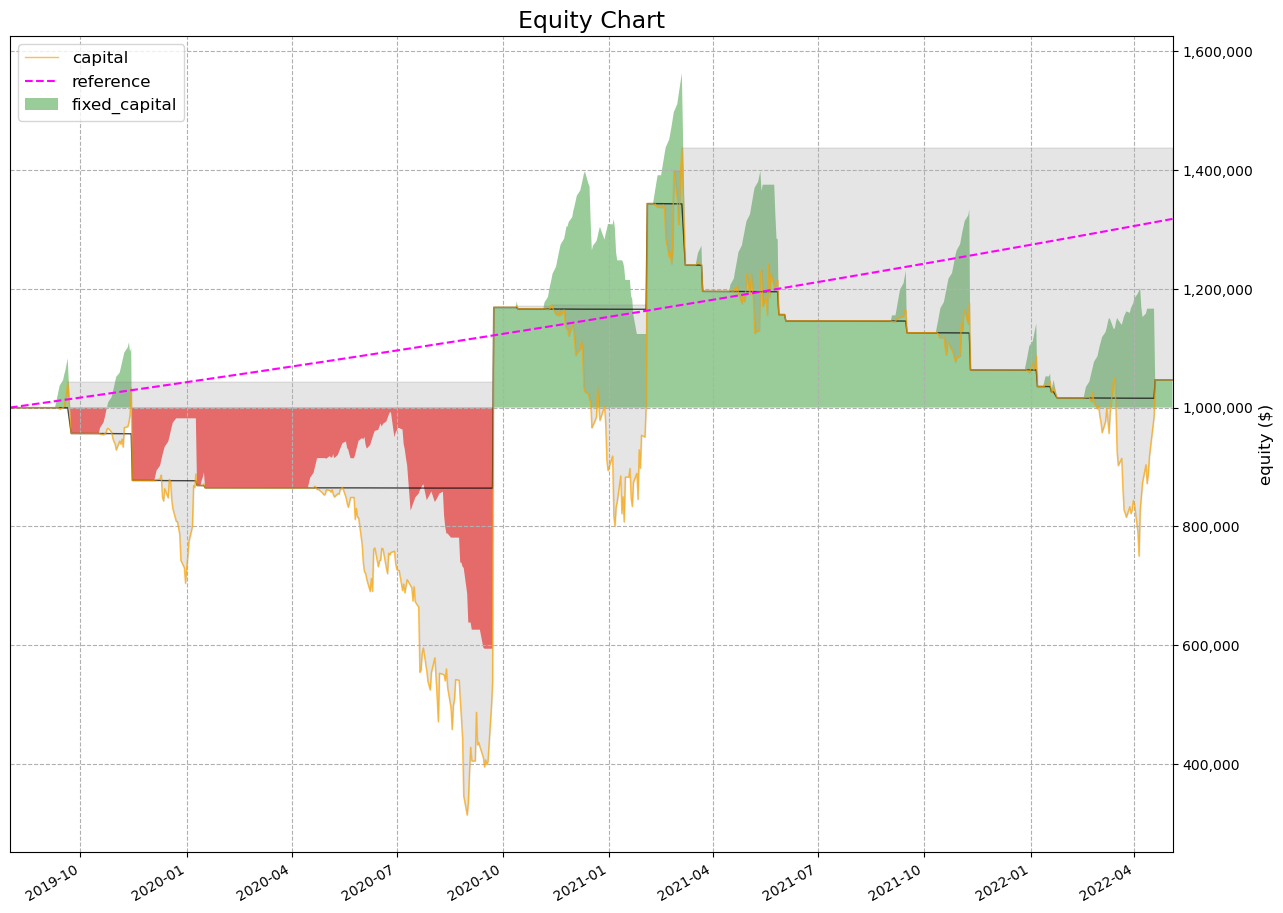

In [6]:
#equity chart 그림 버퍼에 저장
equity_chart_img = system.equity_plot()
buf = io.BytesIO()
plt.savefig(buf, format='svg')
buf.seek(0)
img = svg2rlg(buf)
img.scale(0.4,0.4)

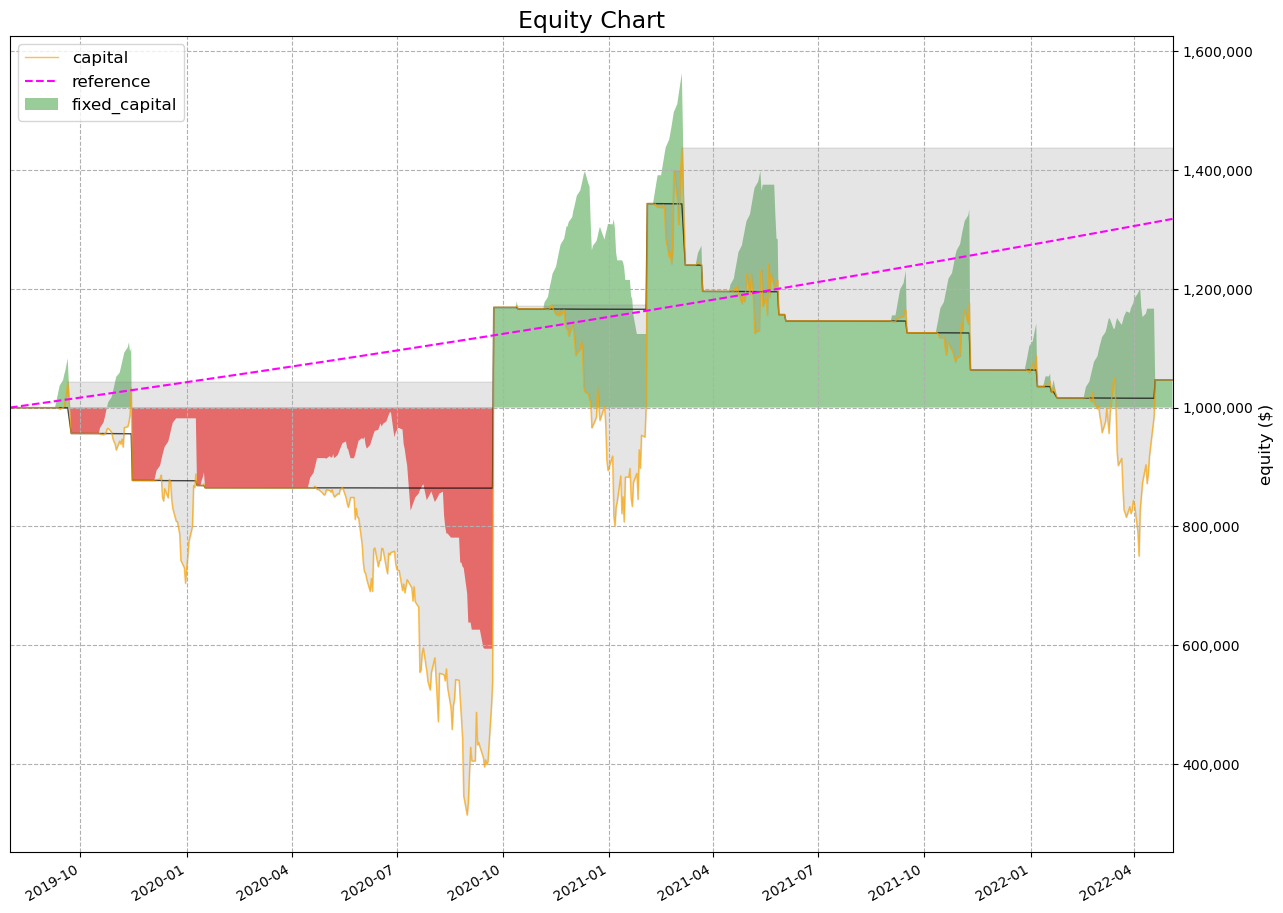

In [223]:
s=system.summary()

### 2. PDF 파일 생성

In [28]:
font = 'Malgun Gothic'
fontdir = os.path.join("c:\\windows",'fonts','malgun.ttf')
pdfmetrics.registerFont(TTFont('malgun', fontdir))
pdfmetrics.registerFont(TTFont('gulim', os.path.join("c:\\windows",'fonts','NGULIM.TTF')))
B4

(708.6614173228347, 1000.6299212598426)

### Page 1. 시스템 설명

In [117]:
p = canvas.Canvas('hello.pdf', pagesize=A4)
p.setFont('gulim',15)


p.drawString(30, 740, f"시스템 이름: {system1['name']}")
p.drawString(30, 720, f"시스템 설명: {system1['description']}")
style = 'Backward Panama Adjusted Method'
p.drawString(30, 700, f"테스팅 데이터: ")
p.drawString(30, 680, f"거래기간: {system1['from_date']} ~ {system1['to_date'] if system1['to_date'] else ''}")
p.drawString(30, 660, f"거래상품: {system1['instruments']}")
p.drawString(30, 640, f"리스크 관리: {system1['heat_system']}")
p.drawString(30, 620, f"최대허용 시스템 리스크: {system1['max_system_heat']}")
p.drawString(30, 600, f"최대허용 섹터 리스크: {system1['max_sector_heat']}")
p.drawString(30, 580, f"최대허용 매매당 리스크: {system1['max_trade_heat']}")
p.drawString(30, 560, f"수수료/계약: ${system1['commission']}")
p.drawString(30, 540, f"skid: {system1['skid']} 틱")
p.drawString(30, 520, f"진입전략: {system1['entry_rule']}")
p.drawString(30, 500, f"청산전략: {system1['exit_rule']}")



#renderPDF.draw(img, p, 30, 100)
#img =ImageReader(im)
#p.drawImage(img, 30, 400)
#p.save() 


### Page 2. 결과요약

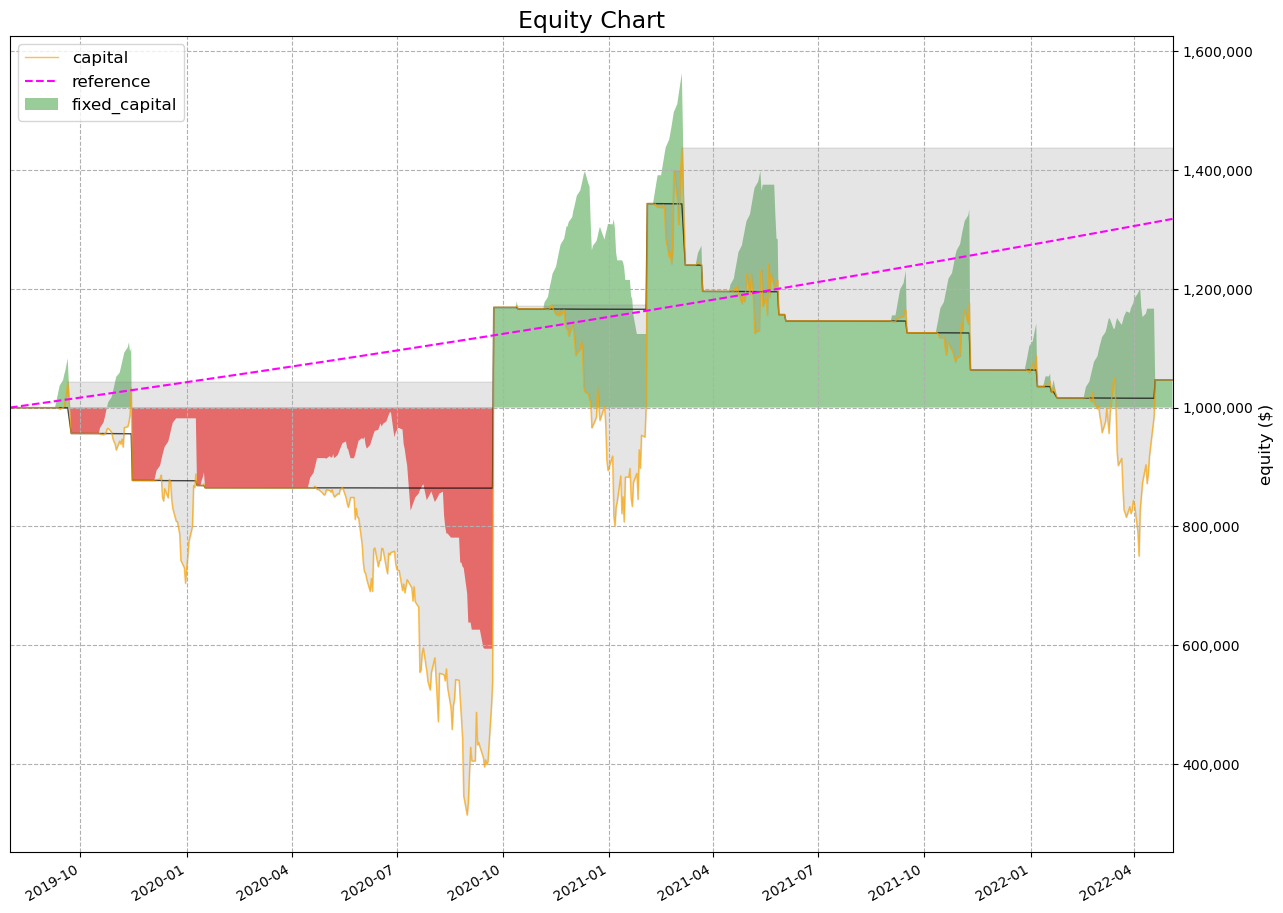

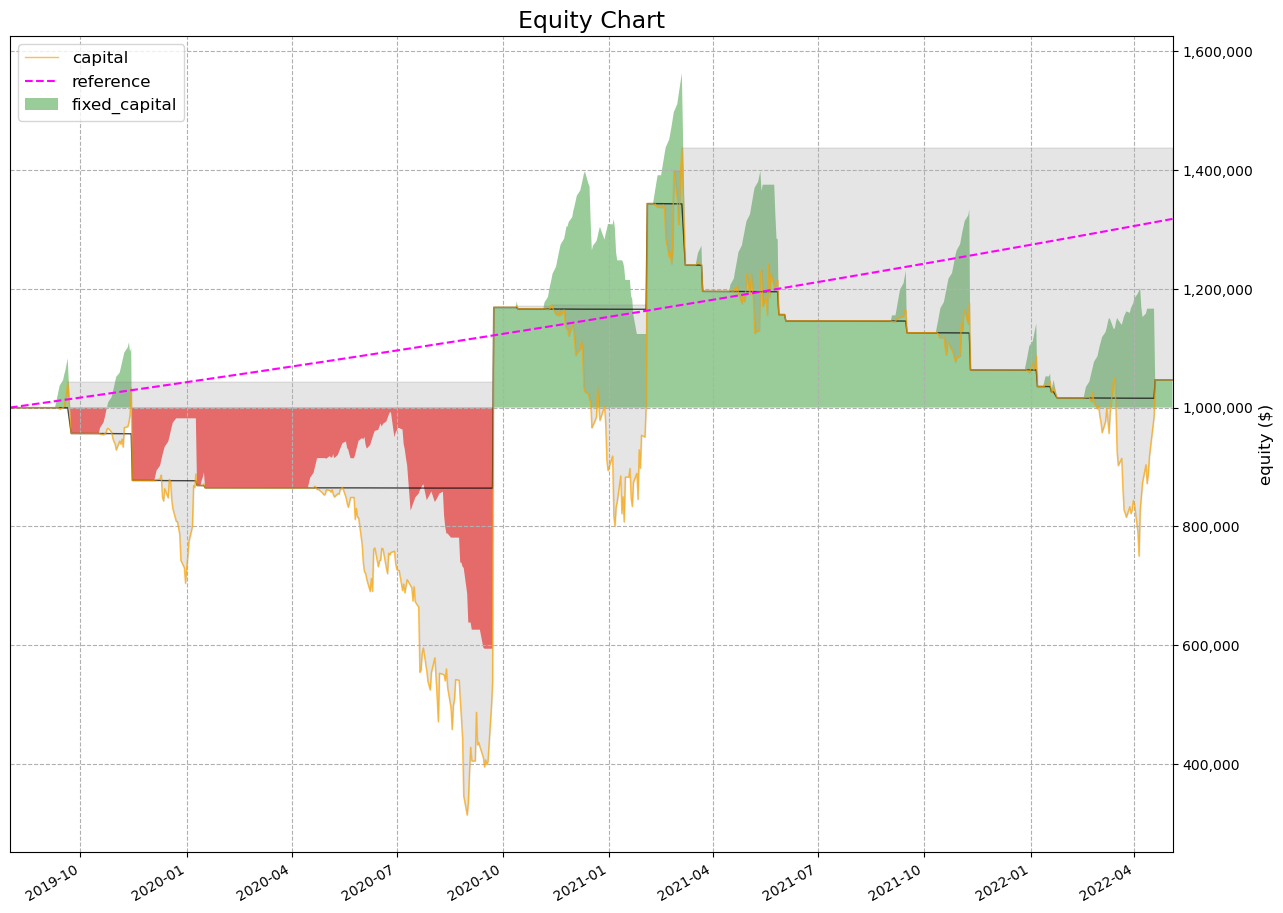

In [118]:
#equity chart 그림
equity_chart_img = system.equity_plot()
buf = io.BytesIO()
plt.savefig(buf, format='svg')
buf.seek(0)
img_equity = svg2rlg(buf)
img_equity.scale(0.4,0.4)

#시스템 성능 요약 (pandas df -> 이미지로 저장)
buf1 = io.BytesIO()
buf2 = io.BytesIO()
summary = system.summary().data
summary[['투자금','최종자산','총손익','Bliss','CAGR', 'MDD', '손익비']].dfi.export(buf1)
summary[['승률','위험대비손익','평균손익','평균수익','평균손실', '보유기간', '매매회수']].dfi.export(buf2)

buf1.seek(0)
buf2.seek(0)

img_summary1 = ImageReader(Image.open(buf1).resize((500,40),Image.Resampling.LANCZOS))
img_summary2 = ImageReader(Image.open(buf2).resize((500,40),Image.Resampling.LANCZOS))

In [119]:
p.showPage()
p.setFont('gulim',15)
renderPDF.draw(img_equity, p, 30, 400)
p.drawImage(img_summary1, 40, 380)
p.drawImage(img_summary2, 40, 320)
p.save() 

### Page 3. 섹터 별 결과

In [126]:
system.summary(level=1)

,총손익,평균손익,표준편차,위험대비손익,승률,보유기간,매매회수
구분,,,,,,,
currency,52810,182,4789.41,8.37%,43.4%,46.037931,290


In [40]:
ret_img.savefig('test.jpg')

In [129]:
df.to_latex()

C:\Users\yosep\AppData\Local\Temp\ipykernel_25108\1669264725.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex()


'\\begin{tabular}{lrrrrrrrrrrrrrr}\n\\toprule\n{} &      투자금 &        최종자산 &       총손익 &    Bliss &      CAGR &        MDD &       손익비 &        승률 &    위험대비손익 &        평균손익 &         평균수익 &         평균손실 &       보유기간 &  매매회수 \\\\\n\\midrule\nResult &  1000000 &  1046877.84 &  0.046878 &  0.00024 &  0.016744 &  69.907683 & -1.101234 &  0.434483 &  0.083706 &  182.103448 &  4559.325397 & -3180.884146 &  46.037931 &   290 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [133]:
df.to

'\\begin{tabular}{lrrrrrrrrrrrrrr}\n & 투자금 & 최종자산 & 총손익 & Bliss & CAGR & MDD & 손익비 & 승률 & 위험대비손익 & 평균손익 & 평균수익 & 평균손실 & 보유기간 & 매매회수 \\\\\nResult & 1,000,000 & 1,046,878 & 4.7% & 0.000 & 1.7% & 69.9% & -1.10 & 43.4% & 8.4% & 182 & 4,559 & -3,181 & 46 일 & 290 \\\\\n\\end{tabular}\n'

In [139]:
str(df.to_html())

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>투자금</th>\n      <th>최종자산</th>\n      <th>총손익</th>\n      <th>Bliss</th>\n      <th>CAGR</th>\n      <th>MDD</th>\n      <th>손익비</th>\n      <th>승률</th>\n      <th>위험대비손익</th>\n      <th>평균손익</th>\n      <th>평균수익</th>\n      <th>평균손실</th>\n      <th>보유기간</th>\n      <th>매매회수</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Result</th>\n      <td>1000000</td>\n      <td>1046877.84</td>\n      <td>0.046878</td>\n      <td>0.00024</td>\n      <td>0.016744</td>\n      <td>69.907683</td>\n      <td>-1.101234</td>\n      <td>0.434483</td>\n      <td>0.083706</td>\n      <td>182.103448</td>\n      <td>4559.325397</td>\n      <td>-3180.884146</td>\n      <td>46.037931</td>\n      <td>290</td>\n    </tr>\n  </tbody>\n</table>'

In [136]:
gfg = pd.DataFrame({'Name': ['Marks', 'Gender'],
                    'Jitender': ['78', 'Male'],
                    'Purnima': ['78.9', 'Female']})
  
print(gfg.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Name</th>
      <th>Jitender</th>
      <th>Purnima</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Marks</td>
      <td>78</td>
      <td>78.9</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Gender</td>
      <td>Male</td>
      <td>Female</td>
    </tr>
  </tbody>
</table>


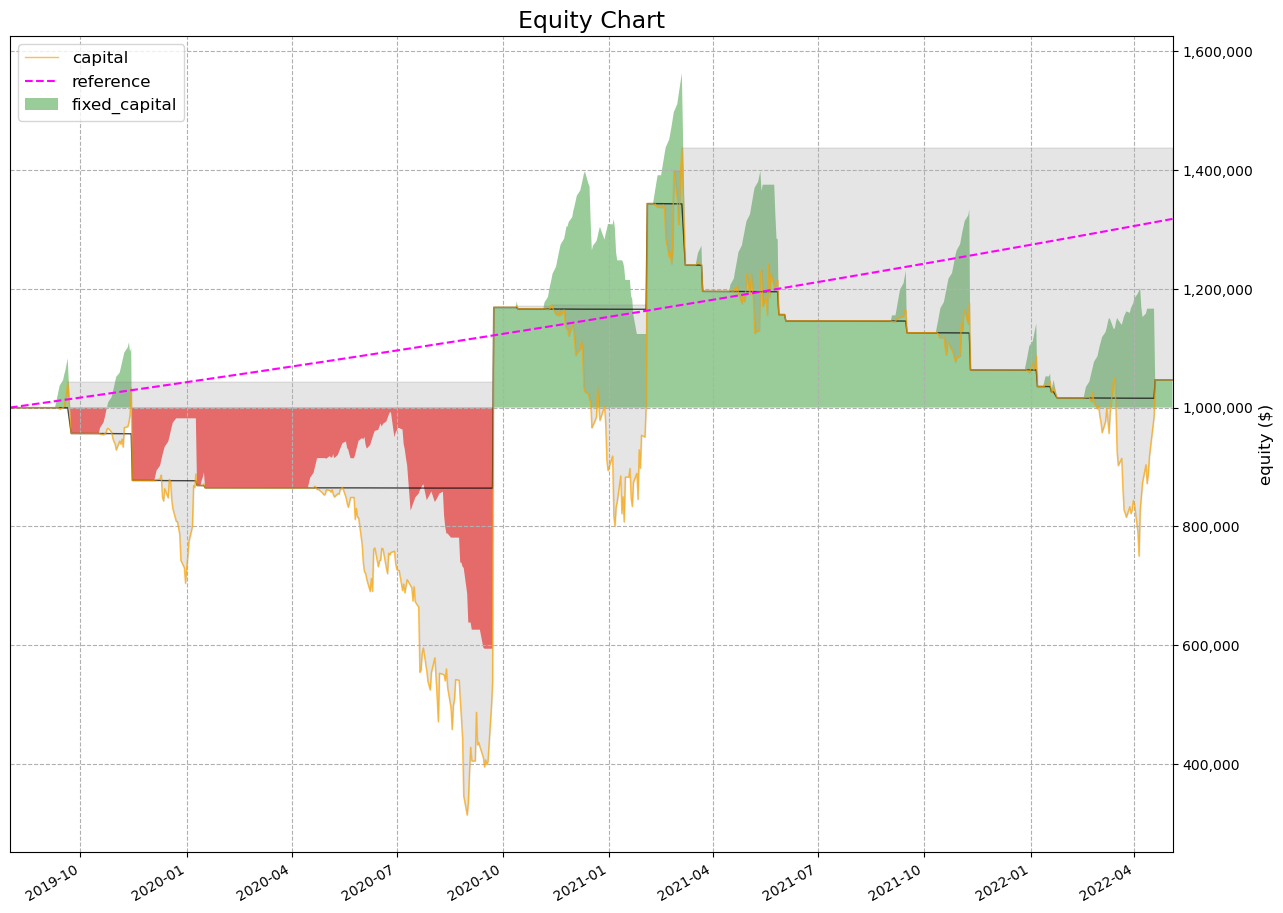

In [146]:
img = system.equity_plot()

In [142]:
plt.savefig('test2.png', format='png')

<Figure size 640x480 with 0 Axes>

In [145]:
plt.savefig('test2.svg', format=svg)

<Figure size 640x480 with 0 Axes>

In [147]:
img.savefig('test3.svg')

In [148]:
df

,투자금,최종자산,총손익,Bliss,CAGR,MDD,손익비,승률,위험대비손익,평균손익,평균수익,평균손실,보유기간,매매회수
Result,1000000,1046877.84,0.046878,0.00024,0.016744,69.907683,-1.101234,0.434483,0.083706,182.103448,4559.325397,-3180.884146,46.037931,290
